<H2><CENTER> Sentiment Analysis<CENTER><H2>

### Importing necessary packages

In [1]:
import re
import numpy as np
import pandas as pd
import nltk
from nltk.corpus import stopwords
from cltk.stop.classical_hindi.stops import STOPS_LIST

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer 

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

In [4]:
import spacy
from spacy.lang.te import STOP_WORDS as STOP_WORDS_TE
from spacy.lang.hi import STOP_WORDS as STOP_WORDS_HI

In [5]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer 
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

### Reading files

In [6]:
import codecs
with codecs.open("C:\\Users\\haris\\Downloads\\Twitter corpus of Resource-Scarce Languages for Sentiment Analysis and Multilingual Emoji Prediction\\data\\data\\emoji_prediction_data\\telugu_data\\telugu.txt", encoding='utf-8') as f:
    txt = f.read()#to read the total file
print(txt[0:1000])

24ఎస్టీయూ తెలంగాణ24 చరిత్రలో ఈ రోజు/అక్టోబర్ 24 󾔖ఐక్యరాజ్య సమితి పతాకం󾔖 󾔖ఐక్యరాజ్యసమితి దినోత్సవం󾔖 󾭺1577 :...
ఈరోజు పుట్టిన రోజు జరుపుకుంటున్న మా అభిమాన హీరోకి ఇవే మా హృదయపూర్వక జన్మదిన శుభాకాంక్షలు.. #ప్రభాస్
ఈరోజు పుట్టిన రోజు జరుపుకుంటున్న మా అభిమాన హీరో #ప్రభాస్ కిఇవే మా హృదయపూర్వక జన్మదిన శుభాకాంక్షలు
*_BE A LIGHT INTO YOURSELF_* *మనం మానసిక ప్రశాంతతను ఎలా పొందవచ్చు.* మానసిక ప్రశాంతత ఇది ఎక్కడ...
అమ్మకు ఎంత గౌరవమిస్తున్నారో భార్యకు కూడా అంతే ఇవ్వండి.. ఎందుకంటే ఒకరు *చందమామ* చూపిస్తారు.. మరొకరు *చుక్కలు* చూపిస్తారు..!!
నీ ప్రమేయం లేకుండా నిన్ను ఎవరూ నాశనం చేయలేరు, అది తెలుసుకుంటే.. నీకు ఒకర్ని నిందించే అవసరం ఎప్పుడూ రాదు; శుభోదయం..!!
పరిస్థితులెలా ఉన్నా నీ కర్తవ్యం నీకు గుర్తుంటే.. జరగాల్సిన పనులు జరుగు తుంటాయి; శుభోదయం..!!
నీకు అందని దానికోసం ఆశపడకు, నీకు నచ్చని దానికోసం కష్టపడకు, నీకై కష్టపడేవారిని మరిచిపోకు, నిన్ను ఇష్టపడేవారిని వదులు కోకు. శుభోదయం..!!
దీపావళి శుభాకాంక్షలు. మన పద్దతి ప్రకారమే అయితే దీపాలు ఆర్పకూడదు. అలా ఈసారి దీపావళి నాకు ఓరోజు ముందే వచ్సినట్టే.
krish tweet ....

In [7]:
sentiment=(pd.read_csv("C:\\Users\\haris\\Downloads\\Twitter corpus of Resource-Scarce Languages for Sentiment Analysis and Multilingual Emoji Prediction\\data\\data\\emoji_prediction_data\\telugu_data\\telugu.csv"))
sentiment= sentiment["label"].tolist() 

In [10]:
#postive=2
#neutral=1
#negative=0
for i in range(0,len(sentiment)):
    if(sentiment[i]==19 or sentiment[i]==18 or sentiment[i]==17 or sentiment[i]==13 or sentiment[i]==12 or sentiment[i]==11 or sentiment[i]==9 or sentiment[i]==8   ):
        sentiment[i]="ne"
    elif(sentiment[i]==15 or sentiment[i]==16):
        sentiment[i]="neg"
    else:
        sentiment[i]="pos"
#print(sentiment)
#dic = {"pos":2, "neg":0, "ne":1}

#sentiment=[dic.get(n, n) for n in sentiment]

### Cleaning Text

In [8]:
def remove_punct(text):
    new_words = " "
    for word in text:
        w = re.sub(r'[.#-:?!\_|""'',-...A-Za-z0-9]','',word) #remove everything except words and space#how 
        new_words = new_words + w
    return re.sub(r"\s+", " ", new_words, flags=re.UNICODE)

In [9]:
text=txt.splitlines()
#print(remove_punct(text_cleaned[0:10000]))
filtered_sentence = []
for i in range(0,len(text)):
    filtered_sentence.append(remove_punct(text[i]))
print(filtered_sentence[0:10])

[' ఎస్టీయూ తెలంగాణ చరిత్రలో ఈ రోజుఅక్టోబర్ \U000fe516ఐక్యరాజ్య సమితి పతాకం\U000fe516 \U000fe516ఐక్యరాజ్యసమితి దినోత్సవం\U000fe516 \U000feb7a ', ' ఈరోజు పుట్టిన రోజు జరుపుకుంటున్న మా అభిమాన హీరోకి ఇవే మా హృదయపూర్వక జన్మదిన శుభాకాంక్షలు ప్రభాస్', ' ఈరోజు పుట్టిన రోజు జరుపుకుంటున్న మా అభిమాన హీరో ప్రభాస్ కిఇవే మా హృదయపూర్వక జన్మదిన శుభాకాంక్షలు', ' మనం మానసిక ప్రశాంతతను ఎలా పొందవచ్చు మానసిక ప్రశాంతత ఇది ఎక్కడ', ' అమ్మకు ఎంత గౌరవమిస్తున్నారో భార్యకు కూడా అంతే ఇవ్వండి ఎందుకంటే ఒకరు చందమామ చూపిస్తారు మరొకరు చుక్కలు చూపిస్తారు', ' నీ ప్రమేయం లేకుండా నిన్ను ఎవరూ నాశనం చేయలేరు అది తెలుసుకుంటే నీకు ఒకర్ని నిందించే అవసరం ఎప్పుడూ రాదు; శుభోదయం', ' పరిస్థితులెలా ఉన్నా నీ కర్తవ్యం నీకు గుర్తుంటే జరగాల్సిన పనులు జరుగు తుంటాయి; శుభోదయం', ' నీకు అందని దానికోసం ఆశపడకు నీకు నచ్చని దానికోసం కష్టపడకు నీకై కష్టపడేవారిని మరిచిపోకు నిన్ను ఇష్టపడేవారిని వదులు కోకు శుభోదయం', ' దీపావళి శుభాకాంక్షలు మన పద్దతి ప్రకారమే అయితే దీపాలు ఆర్పకూడదు అలా ఈసారి దీపావళి నాకు ఓరోజు ముందే వచ్సినట్టే', ' దీపావళి శుభాకాంక్షలు మన

In [10]:
le = LabelEncoder()
Y = le.fit_transform(sentiment[0:len(filtered_sentence)])
set(Y)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18}

### text to vector

In [74]:
tokens = Tokenizer(num_words = np.inf,oov_token = "<OOV>")
tokens.fit_on_texts(filtered_sentence)
word_index = tokens.word_index

In [75]:
sequences = tokens.texts_to_sequences(filtered_sentence)
pad = pad_sequences(sequences,padding = 'post')

In [11]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(filtered_sentence).toarray()

In [56]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Y = le.fit_transform(sentiment[0:len(filtered_sentence)])
la=le.inverse_transform(Y)
set(la)

{'ne', 'neg', 'pos'}

### Splitting data

In [12]:
#Splitting the data into train data and test data
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.20, random_state = 40)

In [13]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

count_classes = y_test.shape[1]
print(count_classes)

19


In [17]:
#Printing the size of the train data, train label, test data and test label
print("Shape train data = ",np.shape(X_train))
print("Shape of train label = ",np.shape(y_train))
print("Shape of test data = ",np.shape(X_test))
print("Shape of test label = ",np.shape(y_test))

Shape train data =  (13592, 3732)
Shape of train label =  (13592,)
Shape of test data =  (3398, 3732)
Shape of test label =  (3398,)


In [24]:
r = "దీపావళి శుభాకాంక్షలు. మన పద్దతి ప్రకారమే అయితే దీపాలు ఆర్పకూడదు. అలా ఈసారి దీపావళి నాకు ఓరోజు ముందే వచ్సినట్టే.ర"
rv = vectorizer.transform([remove_punct(r)])
print(rv.shape)

(1, 3732)


In [29]:
pad = pad_sequences(rv,padding = 'post',maxlen = 3732)

TypeError: sparse matrix length is ambiguous; use getnnz() or shape[0]

In [25]:
print(clf1.predict(rv))

[2]


### Classification Algorithm

#### Decision Tree Classifier

In [20]:
clf1 = DecisionTreeClassifier()
clf1 = clf1.fit(X_train, y_train)

In [21]:
y_pred = clf1.predict(X_test)

#### Decision Tree Classifier Report

In [23]:
#Computation of the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy = ','%.2f'%(accuracy*100))

Accuracy =  83.17


In [116]:
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred, output_dict=True)
report1 = classification_report(y_test, y_pred)

macro_precision2 =  report['macro avg']['precision'] 
macro_recall2 = report['macro avg']['recall']    
macro_f12 = report['macro avg']['f1-score']
accuracy2 = report['accuracy']

print(report1)

KeyError: 'accuracy'

In [42]:
import scikitplot as skplt
import matplotlib.pyplot as plt
skplt.metrics.plot_confusion_matrix(y_test, y_pred)


[133, 440, 566, 91, 36, 291, 313, 24, 35, 94, 55, 24, 10, 114, 9, 129, 7, 2, 176]


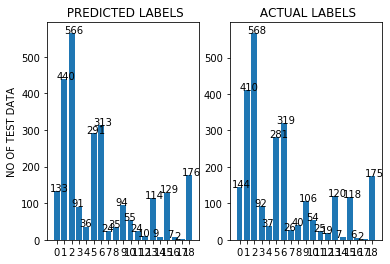

In [43]:
ax=plt.subplot(1,2,1)
x=np.arange(19)
height=[]
for i in range(0,19):
    height.append(len(y_pred[y_pred==i]))
print(height)
plt.bar(x, height=height)
plt.xticks(x, x)
plt.title(" PREDICTED LABELS")
plt.ylabel("NO OF TEST DATA")
for index, value in enumerate(x):
    
    plt.text(value-1,len(y_pred[y_pred==value]), str(len(y_pred[y_pred==value])))
height=[]
for i in range(0,19):
    height.append(len(y_test[y_test==i]))
plt.subplot(1,2,2)
plt.bar(x, height=height)
plt.xticks(x, x)
plt.title(" ACTUAL LABELS")
for index, value in enumerate(x):
    plt.text(value-1,len(y_test[y_test==value]) , str(len(y_test[y_test==value])))


#### Random forest Classifier

In [17]:
clf = RandomForestClassifier(max_depth=200, random_state=0)
clf.fit(X_train, y_train)

C:\Users\haris\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=200, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [18]:
#Predict the class label for the test data using the trained model
y_pred = clf.predict(X_test)

#### Random forest Classifier Report

In [19]:
#Computation of the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy = ','%.2f'%(accuracy*100))

Accuracy =  84.02


In [47]:
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred, output_dict=True)
report1 = classification_report(y_test, y_pred)

macro_precision2 =  report['macro avg']['precision'] 
macro_recall2 = report['macro avg']['recall']    
macro_f12 = report['macro avg']['f1-score']
accuracy2 = report['accuracy']

print(report1)

              precision    recall  f1-score   support

           0       0.74      0.73      0.74       144
           1       0.64      0.79      0.71       410
           2       0.73      0.87      0.79       568
           3       0.77      0.68      0.72        92
           4       0.60      0.32      0.42        37
           5       0.77      0.81      0.79       281
           6       0.81      0.78      0.80       319
           7       0.81      0.50      0.62        26
           8       0.79      0.47      0.59        40
           9       0.78      0.54      0.64       106
          10       0.75      0.61      0.67        54
          11       0.80      0.64      0.71        25
          12       1.00      0.21      0.35        19
          13       0.88      0.62      0.73       120
          14       1.00      0.43      0.60         7
          15       0.86      0.70      0.77       118
          16       0.60      0.50      0.55         6
          17       1.00    

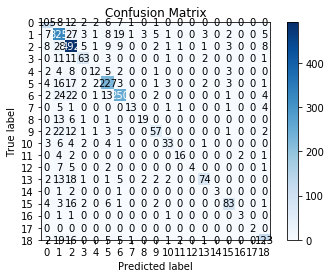

In [48]:
import scikitplot as skplt
import matplotlib.pyplot as plt
skplt.metrics.plot_confusion_matrix(y_test, y_pred)


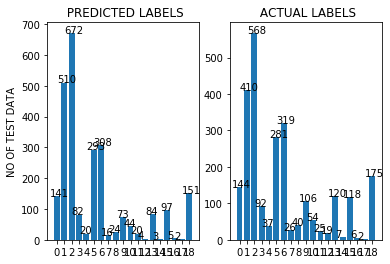

In [49]:
ax=plt.subplot(1,2,1)
x=np.arange(19)
height=[]
for i in range(0,19):
    height.append(len(y_pred[y_pred==i]))
plt.bar(x, height=height)
plt.xticks(x, x)
plt.title(" PREDICTED LABELS")
plt.ylabel("NO OF TEST DATA")
for index, value in enumerate(x):
    
    plt.text(value-1,len(y_pred[y_pred==value]), str(len(y_pred[y_pred==value])))
height=[]
for i in range(0,19):
    height.append(len(y_test[y_test==i]))
plt.subplot(1,2,2)
plt.bar(x, height=height)
plt.xticks(x, x)
plt.title(" ACTUAL LABELS")
for index, value in enumerate(x):
    plt.text(value-1,len(y_test[y_test==value]) , str(len(y_test[y_test==value])))


#### SVM

In [107]:
from sklearn import svm
clf4 = svm.SVC(kernel='linear')

In [108]:
clf4.fit(X_train, y_train)

ValueError: bad input shape (13592, 3)

In [98]:
y_pred=clf.predict(X_test)

#### SVM Report

In [99]:
#Computation of the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy = ','%.2f'%(accuracy*100))

Accuracy =  57.75


In [100]:
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred, output_dict=True)
report1 = classification_report(y_test, y_pred)

macro_precision3 =  report['macro avg']['precision'] 
macro_recall3 = report['macro avg']['recall']    
macro_f13 = report['macro avg']['f1-score']
accuracy3 = report['accuracy']

print(report1)

              precision    recall  f1-score   support

           0       0.96      0.47      0.63       144
           1       0.85      0.45      0.59       410
           2       0.36      0.98      0.53       568
           3       0.95      0.57      0.71        92
           4       0.20      0.03      0.05        37
           5       0.94      0.47      0.62       281
           6       0.87      0.48      0.62       319
           7       1.00      0.50      0.67        26
           8       0.81      0.42      0.56        40
           9       0.85      0.44      0.58       106
          10       0.91      0.37      0.53        54
          11       0.88      0.60      0.71        25
          12       1.00      0.21      0.35        19
          13       0.97      0.51      0.67       120
          14       1.00      0.43      0.60         7
          15       0.97      0.50      0.66       118
          16       1.00      0.50      0.67         6
          17       1.00    

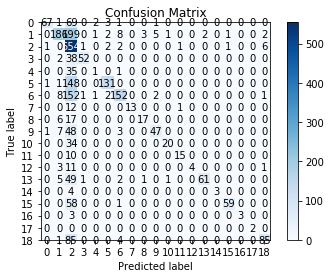

In [101]:
import scikitplot as skplt
import matplotlib.pyplot as plt
skplt.metrics.plot_confusion_matrix(y_test, y_pred)


[70, 220, 1526, 55, 5, 140, 174, 13, 21, 55, 22, 17, 4, 63, 3, 61, 3, 2, 95]


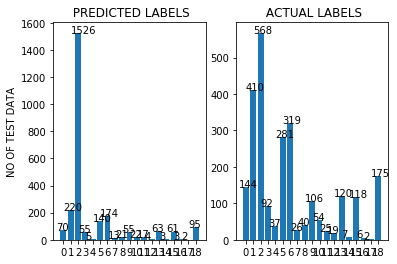

In [102]:
ax=plt.subplot(1,2,1)
x=np.arange(19)
height=[]
for i in range(0,19):
    height.append(len(y_pred[y_pred==i]))
print(height)
plt.bar(x, height=height)
plt.xticks(x, x)
plt.title(" PREDICTED LABELS")
plt.ylabel("NO OF TEST DATA")
for index, value in enumerate(x):
    
    plt.text(value-1,len(y_pred[y_pred==value]), str(len(y_pred[y_pred==value])))
height=[]
for i in range(0,19):
    height.append(len(y_test[y_test==i]))
plt.subplot(1,2,2)
plt.bar(x, height=height)
plt.xticks(x, x)
plt.title(" ACTUAL LABELS")
for index, value in enumerate(x):
    plt.text(value-1,len(y_test[y_test==value]) , str(len(y_test[y_test==value])))


#### Comparision

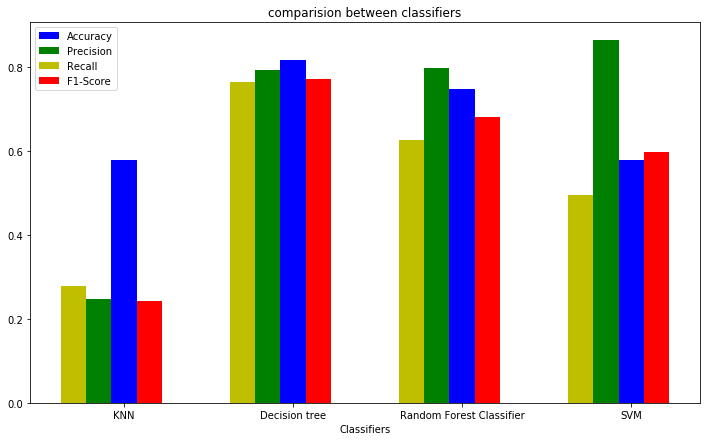

<Figure size 720x720 with 0 Axes>

In [103]:
a=np.arange(3)
w = 0.15
fig,ax=plt.subplots(figsize=(12,7),edgecolor='k')
p1=ax.bar(a,[accuracy1,accuracy2,accuracy3],w,color='b')
p2=ax.bar(a-w,[macro_precision1,macro_precision2,macro_precision3],w,color='g')
p3=ax.bar(a-2*w,[macro_recall1,macro_recall2,macro_recall3],w,color='y')
p4=ax.bar(a+w,[macro_f11,macro_f12,macro_f13],w,color='r')
ax.set_xticks(a)
ax.set_xticklabels(('Decision tree','Random Forest Classifier','SVM'))
ax.set_title('comparision between classifiers')
ax.legend((p1[0],p2[0],p3[0],p4[0]),('Accuracy','Precision','Recall','F1-Score'))
plt.xlabel('Classifiers')
#plt.grid()
plt.figure(figsize=(10,10))
plt.show()

In [36]:
set(Y)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18}

In [5]:
import tkinter as tk
top = tk.Tk()
# Code to add widgets will go here...
top.mainloop()

In [20]:
!pip install tensorflow

In [14]:
model = Sequential()
model.add(Dense(500, activation='relu', input_dim = 3732))
model.add(Dense(100, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(19, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [15]:
model.fit(X_train, y_train, epochs = 20)

Train on 13592 samples
Epoch 1/20
13592/13592 [==============================] - 3s 240us/sample - loss: 2.3042 - accuracy: 0.2677
Epoch 2/20
13592/13592 [==============================] - 3s 221us/sample - loss: 1.8340 - accuracy: 0.4210
Epoch 3/20
13592/13592 [==============================] - 3s 223us/sample - loss: 1.2311 - accuracy: 0.6232
Epoch 4/20
13592/13592 [==============================] - 3s 222us/sample - loss: 0.7580 - accuracy: 0.7745
Epoch 5/20
13592/13592 [==============================] - 3s 225us/sample - loss: 0.5166 - accuracy: 0.8523
Epoch 6/20
13592/13592 [==============================] - 3s 223us/sample - loss: 0.3820 - accuracy: 0.8955
Epoch 7/20
13592/13592 [==============================] - 3s 229us/sample - loss: 0.3201 - accuracy: 0.9140
Epoch 8/20
13592/13592 [==============================] - 3s 237us/sample - loss: 0.2842 - accuracy: 0.9219
Epoch 9/20
13592/13592 [==============================] - 3s 238us/sample - loss: 0.2495 - accuracy: 0.9274
Epoch

In [28]:
pred_train= model.predict(X_train)
scores = model.evaluate(X_train, y_train, verbose=0)
print('Accuracy on training data: {} \n Error on training data: {}'.format(scores[1]*100, 1 - scores[1]))   
 
pred_test= model.predict(X_test)
scores2 = model.evaluate(X_test, y_test, verbose=0)
print('Accuracy on test data: {} \n Error on test data: {}'.format(scores2[1], (1 - scores2[1])))  

Accuracy on training data: 95.0559139251709 
 Error on training data: 0.049440860748291016
Accuracy on test data: 0.5382577776908875 
 Error on test data: 0.46174222230911255


In [20]:
r = "దొంగల స్థావరాలు ఎవరికి తెలియకూడదని దొంగలు జాగ్రత్తపడతారు,సమయం ఆసన్నమైంది నువ్వు నిప్పువో లేదా కంపువో నిరూపించుకో గజదొంగ …"
rv = vectorizer.transform([remove_punct(r)]).toarray()

In [72]:
rv.shape

(1, 3732)

In [21]:
loaded_model.predict(rv)

array([[3.1469288e-10, 4.1795545e-09, 9.9999726e-01, 2.9842548e-16,
        2.9559556e-14, 2.5204788e-06, 5.3769722e-09, 2.4395992e-18,
        4.0645087e-12, 1.9429024e-07, 3.7547404e-13, 4.5038368e-15,
        3.5620539e-15, 3.1248640e-10, 2.0640482e-12, 2.7051053e-08,
        4.6502853e-20, 3.8946863e-14, 4.5227631e-09]], dtype=float32)

In [29]:
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk


In [31]:
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model.h5")
print("Loaded model from disk")
 
# evaluate loaded model on test data
loaded_model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
score = loaded_model.evaluate(X_test,y_test,verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

Loaded model from disk
accuracy: 95.47%


In [30]:
from tensorflow.keras.models import model_from_json

In [125]:
pad.shape[1]

27

In [123]:
y_test.shape[1]

3

In [18]:
model.predict(line("అలాగ.. సరే గాని బెడ్ దిగి బ్రష్ చేసి రా టిఫిన్ చేద్దాం నేను పోతున్న వెనకే వచ్చేయి సరేనా"))

NameError: name 'model' is not defined

In [24]:
def line(txt):
  text=txt.splitlines()
  #print(remove_punct(text_cleaned[0:10000]))
  filtered_sentence = []
  for i in range(0,len(text)):
      filtered_sentence.append(remove_punct(text[i]))
  tokens = Tokenizer(num_words = np.inf,oov_token = "<OOV>")
  tokens.fit_on_texts(filtered_sentence)
  word_index = tokens.word_index
  sequences = tokens.texts_to_sequences(filtered_sentence)
  pad = pad_sequences(sequences,padding = 'post',maxlen=327)
  return pad

In [40]:
print(pred_test[1])

[2.6408501e-05 3.6157608e-02 9.6381599e-01]


(16990, 3732)

In [19]:
z = "GTTGAGAGCGAGGGGTGCAGAGCGTCCAGAGGAATGTTCGTTAGGGCGAAAGAGCTAAGACCAACAATAAGGATAGGCCACACATCCAAAAAAAATGATGTGAGCTCCGCGATCGAGAAGGTGAAGCGTAATTGGTGCGATCATCGGGCAAACTCCGTAGCGAAAAAGCGATAATTTCCAGGGAGAGTGGAGACCCCGGGGGCCAATAAGCTCAGGTTTACTGAGATAATAAAAATGAGCGGGATAGGGAAAAGATTACAGGACACTCCAAAGTATAACGAGCTGGGGCGTCGGTAGTATTCCGTTAAAAGACGGACGATGAAAAATACTTACGCGCTTGCATGCCACACTGGAGGCCACAGTAACTGCTGTAATCTAGCCTCCTTCAAGTATCACAGCTCAACGCACTGCGTGCGGCGCACACTAAGAGAAAGCCTAAAGCGCCAACAACAGGAGAGCGAAAGGGGACAAAATTATAGACGTTGTGGAAAAATGAATGAGGCCAACTAAAGAGAGAAAAGAGGAGGAGAGAATACAGACGTAACCCCCCGAAAAGAGGACGGGCATGGTGAAGGCCGGAGAAGGAGAGGATGTGGACGGCATGGCGGGGGGGGGGAAGACGAAGGCGGGAGTGAATAGAGCGGGAACGGGCAGGAAAGATTCCCTCGCACCGGCCAATATTGACAAGCCATGAATCACAAAAAAGTACCAATAGCATTTCCCGTTATAAAGGATTAGCTATAACCAAGACTAACCACATACGAACCAGAAGACCAAGCCAAAAGACAAGAATATAACAAGGAACAGGCAACGAAAAGTGTCCGCGCACCAAAACTGCCAGTACGATCGATTAGTAAGTAAAGTTGAGTCAAACTGTTTAATGATATCCACGCAGCAAAGACTGACATGAGGTATCGACAGATAGGGACAGCTACCTAATCTCCCAAAGGACGCCAGTATGCTACCCTGTACCCAGCTATTAGGCAACTCCCTTCGGATAATGGATTGCTGTGTTCAAGCCAAGGGCGCTCATCCTCCGCTGTTTCCTGATTACAGCGGTACTCATAGTTATTCAACTACGCCGGTACCAAACATACGAAAGAAATCGTAAAAAGTGAAACACCGACACGGAGCTCAGCCTATTGCAAGGACGTGGAGGCGGAGGGTGCAGACCAAGAAACCCAGCGAAACACTAGTTAGAGGAAGTTGAAGTGCTGGAACAACAACATTAGTTCAAGAGTTCATAAATGACCAACTAAAGGAACGGCAGTTAATTCACAAATATACAAACAAACAACATACAGGAAAGAAGTAAGAAGAGTCGCATATTTGCGATAGTCGAAGAGAAGGCAGCGCGCCCCAAAAACCTTAAAAAGCGAAACGACCCATGTCACCTACAGGAAAAGAACCAATACAAGAGAGAAACCAAAAACCTTCCACCCAACCCCGAGCGCAGACGCCAGACGTGAGCAGTGTCACCTACTGACCCTGAGGGTCTCCCCACATCTCAATACCACCCGACGAAAGCAACCGCCCCATGTAAACATCACAACTCCGCAAGTCACTGCTGCGACGGCTCAAGTCGTCAGCAGGAAACCACGAGAGGAGGCAAATACGCGC$CACCCGCCCCCCGCCAAAACATCCCCCCTGACGTCCTAAAAGCACACACGCCCTTCCCGCCGACTCAACCCAACCCCACAACCCACCAGCGCTTCCGACCGAATGCCGCCTACACCAGCCTGCAAGACCCGCGGACTGGCCGGCGCCCACTAGCCGCTGCAAACACGAAACCGGCACCCCCACTCACCGTCCAACCGGAGAACGCAGAACGCAACGACCCTTAGGGATCGCACTAAGTGAGAGGGTACAAAGAGCGGCAGGGGGGGGCAACGACTGTAAAGAGTATGCAACAAGAGGTAACTTGCGCTAAAGAAGACTCGAGCAGGTAAAAGAGGGTACGACAGGGCTTTCCGCAGGGAACCCCTACCATCTCGTCCAGTATCAGCATCGCCGCTACGTAATATACTGTCCATCACGCGACATTCGAAGGTACCGTGATTATGAAGGTATGTTCTCACCGTCCTGCTAACTGGCATAGACGACGTGAGTGATAAAAGTTTATTGAGATCAGATACAGTAAGACGACACAACAGACTGAGGAGTACAGCGGGATTGCGGAGAGGGGGTGATTAAGGGCAAAGAGGGCTACGAACAGTCAGAGGGGGGGGGATTACATCAGATTGTTCTACGAGGGGGCTGGGGTAAAGAGGGAGCCCGTGGGACTGCTCGACTCATAGCCAAGATGTAGAGCGGTCCAGCGAGGCAGTAGGGAAGTGGTATGCGGAACCACCAGCCCGAGGTTTCCCGACTGCCCCCAACCGCCACCCCTTACTGCAGCCACCAGGCCTATACCCTCAGATATTACCTTATAAAGTGGGTACGTTCCTTCCGTCATTCCAACGAGGACGACCTGGAGATGAGGTAGGCGTTTGGATGTGTCCCCGGGGGGTGGGGGATCACTGTACAACAGCCTCACGAAGGGATTCCGAATACGAAGCTAAAAGGAGTGCTCGTGTGCAACCAGGTCTATGGTGTGGGAAGGCTAGTAGGGTTTCGCCGCTGGTCGAAGCGTACGGAGGTGAGCGCGCAGTCTCGGACGTTTCAAGCCGCTCCTCTATTTCGATATGACCTCGTTGTTGCATCTGTGGACAACCGGAGCAGTCGGCGCTGTCTTCCTGCATCCCGCAGTTCCTCTTAGTCAGTGTCAGAGATGTAGGGGGACCAATTGCCGGGAGACACCGCGAAATCCGGTCGGTACGTATGGCTCCGTTTTCCGTTTTATGCGCTCTCCCCGTTAGAACGTTCAAGCCGGCTTCGTGCGCCCCCGTTCTAGGATGTGTGACGCATTTCGTCGCCGACGCGGTGTTCGTGTGCTTCTGGGCCTCTACGCGCGATTCGGGTGGCCTGCTTTTTCGCCACGCAGCCGGACTTGCGCAATTTTAAGTTACGAAACGATGAGGGCTTTCCCGAAACTTTACTCTCTGAGTCGCCCTGTTACGAGGTAAGAGCCCTGTTGCCGATCACCGTGGAGGCGGGAGCTTTTGCGGCGCTATATGGCGTGGGAGGCCACAAGAATGAAGAGAGCGGATTAGATGACAAGCAAGAATGTAGAGTAACCAAATATGGTAGCTGGGTAGCGGGTCCGGTCTTAGAACGAGAGGTGGTAGGCAGATGGAAGTGTTTCAGGCAGGGGCGAACGACCTGTGGGAACAAACAGGGCACGGCACGATAATCACGGCAGAAGACTAAGCTTTACTATCAGTCTCCGCGCGCGGCGGAACAAGTATAGGATAGGTCGAAGTTGCATATGTAAGTTTATTATGGAGGGAAGGTAAGCTGGGCTGTGGAGACGAAGGCCCGAGGGTGCCTGGCGACGCGCGTGCCGAGCTAGACACACGAGACAAACGGTCGCGAGGAGTGGGGCTCGGGGGAATGATATCTGATTTTTTTGTTAATCAGGTCTGCACATGATTTGGGGACCGTTGGTTGGAATGATGAGAGGGGCGCCAAAAAGGCATGGTAAGAGGAGGGGGCATCGTTTTGGAAAATCAGGTTCTTCATAAGGGTGGAAGTCTGTGAATAATCGCCATACGGGGGGACGGGAATTGAGTGAGCATCGCGTCCACGAATTGGGCGGATGTGGGCCGTCTCGCTCCGCGAGTGGGGCGCTGCGGTGCACACAGGTGGGGTGGGGGACTGGGTTAGGCGACGTCCGGAGGGGTAGGTCGGGTAGCCAAAGTAGGCCTCGCCAATGCCCTTCGCTGTACAGAGGGCGGCAGGTCCAGAGTGTGTGCCGGCCCCTTAAGGACGGGAAGGCTCGCGGCGCTCGGGAGCCTGCTAGGGCGCACCGTGCCATGACCCAGTATTTTCCTAAGAAGAACGCCGACTCTGCCAATCCCATGCTGAGCATTCTTTTCGGACACCCTAAGTCCCGAAGCCTCACGGGGTGATGTTGGGGGGAGCTAGGGGGCGCGGCGGCGCGCAAGGTATATATTGCTTGAGTGGCCGACAGAGGATACACAAAGACCCGCTGTTTACGACGCCGGAGGGGCCCACAGTACGGTTCGGGCCCGGGACGTGGGTGGTACTCAGCCCGGTTGTCCCGCCTTTCACTATCGTCCTTGGAACTATGTGCCAGGTGTACCCCAATCCCAGCAAAGAGAAGTACACGGCTAGCGGTAGCCTGGACCGGTCGGCGGGAGCGTCAGCCCCCGGTTCGCTCAGAGTTTTCCGCAACATAGTAGGAGGCCACCCGAGTCGGGTCCGGGCCGTCCACAGACGCGGCTGGGCGCTTGGGGCGGTCGGTTGACAGGTCAGTTGCCGCGGTGACTGGTCAGCTGATCGCGAGGGCAAACGAACAAGGTTGGCCAAAGGCGAAGACAAAGCGTGAGCGGCTGCAGAGGAAGCTGGGATTCGCTAGTCGATTGTGCGACAGTTATGTTCGGTGATGGAGGTTTTTCTTGGGGAAGGAAATTACGTCTCGGGGTACTATGTGTGTGCGATACATAAATTTCGCTTTACTGATTTTGCGCGCGAAACCACTCCTTGAGTGTCCTGGCAGATATAAGGTGTGTAGGGATGCGTTGCTTGGCTCGGATCTGGTCGGGCGGGCGGGCCAAACTACAGCTCGACTCAGTATGTGTGGCCGTGGGCGGCGCGGACCAAGCGTAGTTGTTGTCTTGAATTGATATCAGATCATTCTGCGGGTTGAAGTGGGTAGGAATCAGGGTGGAAACGGCAGGAGGAGGACGGAGTGCCAGCGGACAAAGAATGGTTGTGGCAAATCAGTAGTGTTCTCGTCACCGCGCTATGAGGCGACAGGAGTCGTTACGGCGGTAAGAGTTGAGTTGTATGTGACGCTGGGACCCTATAATCGCTCTGTACGTAGTCGGCCCCGTGCGCGCAGAAGTGGTAGTACAGTTGGAGTGTTGTGGGGGAAGGGATAAGACGAGTGTGGATGTACGGTGCGGGATGGCCCTGGTTTTTTTTCCTCGTTTTATTCGGTTTAATTTTATAGGGGCTTTTGGAACCTTCGCCGTCTAATTAGCTTCATTATGTATCCAAATGATTGGAAGCTCCTTGTGTTACGCGGACTTTATGGAGCTCATTTTTTTACCGCAGGCGCGCTGAACTGCCCGCGTTTGCAATAACCGTTAACATTACTCGTATTACCGATGGGCGTGCTGATTTTCAATTACGTCTACCACCCCTTTTCTGCTTACCGTGAATACTTCCCAAACGTCGGAATGACCGGTTGACACTATTCTTGGTTCCGTCCCGTTTTTTACCACTCCTAGGCGAGATGCTAGACCGACCTGAACTCAGATACAGGTAACAGCCCCTAGCGCAAGATTGCGCCGCTGTCCCGCTCTATGCAGACTTTGCATACTCATTAACTCATCAGCGTCTGCGCATTTTTCGATGACCTCGTTGCCGCGTTGGATACCTTCGCGAATACATCTTCTCATCCCAGTGCGTCTGATTTGTGTTTTTTTCGTACCCTCCTTTTAGTTCTCAGCACTCTCTATGACTAGCCCGCTTATGTGTGACCCTGATGTGCAGTGTAAGATTCTTGTAGTCACTCACTAACCGAAGATGGTCCGCGGATAGCCACCGAAGCGTCGATTCCGGTCCAAGTGGGCGTGGGGACGGCTGACAAACAAGGCGGCCCTCCCCAAGCTCTGGTGGGGAACTACCGGCTGTTTCGCATGTCGCTAGGAGGGGAACTGGAGGGCGGCGGGCCTGAGATAGCACCGCCCTGGTTAGGTGCGGAGTACAGGGGTTGGTTACTAGGTTCTTCTTCCGCTACTCCCATTTATTGGCTATATGCTATCCGTCCTTCACGGCCCTCCCCTTTGTCTATTGATGACGACCATTCATGTTTCCTTTTCCACCCATTCACCCTCCTCCTTGTTTCAAATTAATTCGCTAATGCTTTATATTGGGCTTAATTCTTACACGCCCCAACCTGACCCCCCTCTTATTGTGCCGTGTATGGGGGTCGATCGGAAGGGTTGCTTCGTCGTTCGAAGAGCCTTAATGGTCTGGGTGGGGCGGACAAAAGGCAGTGGATGGTAGCTGTCACCCTCCTCCCCAATGCCCTAGCTGCGGGCGGAGGTCACATAGGGTTTGGTTTTTGGGGACTGTAGATGTTGCGGGCTTGCGCAAAGCTGCAACCCTGGGAATTAAGTTGGCAGCGGGGGTTGGCGTCAAGTACGGAACCGCCGAGCTGCCCGCATTGCGACACTCGCGTCTGTGGCTGAGGAGGCAACCCGTGCCCTTCGCCGTTGTCTTTCTGCGGCCAGGATTTCGTGTCCCTTCAGTACAGTGCCTGCTAACTCTTCTGGTACCCACACGTGTCGTCTCCACATCTTGGACACCTCGTACTCCAACTATTTTATGCGAATATGGCCTTATAGGCCCGGGGAGGGGACGACGACTTGATCCTATTCGCAGGTCATGGTATGCCTTTTAGGTATCCTCCTACGCAAACTTCAATTATATCTCTCTAGCTGCACGTAGCTGCCCTATAACTGTCGATCACACCTCTCGTTTTCCTACAACTATCCCCTTCACGGTGGTTTACAGTGCTTGTTGAATGAGAACTCTGTCCCCGTACGGGTTTCCTTCCTCCGCTTCCTACCTTATGTTTTTGACTCAAAATCCGTCCGGCCTGAGTACCGTACTTATTTAGATACTTTGCCCCATTCATGATGATAGTTGAACTTATCCTGTGGTCTCATGCTCCTCCTACAGTCGTTGTTTGATGTTCCCCTCACCTCACTTCATTTCGTGGACCTCCACCGGTGTCACCAATTGCATTAACGCACTTGTAAGTCACATCTTGTCGACGCCGTCGCCTGTAGTAGTTTCCCCCAGGGCCACACTCCTCTCCACCCTGTCCTGACGGCCCGTTGCCATTCATACGCCCAACATTAGCCATAATTGGAACCTAGAGAAGCGGCTTCTTTTCATACTAAGCTTTTTCCTCCTCAACTATCCCATCTCCACCTTCTGCGTCCATTCGCTATAGATCTAACCCTCTTTGCTTTATCACCTCTCGCACAGTCTCGTACGTCGCTTCTCTACGTTCAGACAAATGGGTAACAAATCCAGAGACCGGGCCTAAGCGGGGGCCGGAGTAAGGGAGAGCCGTTTACCAGAACCGAAGCTACCTGACCTGTTCTTCAGTCTCGGACCGTGGGGCGCCCCCGCGGGCGTTGTTTGACGTAGTCCAGGCGTCCCCGGACAGGAGAGAAGCCGTCTAGCTCCTCAGGTTGGGGTGGTCACTCCTTGAAAATTACTCGTGGTTTCCCCCTTACGGCATGCGACCCCGTTGACACTCCCGCGCCGCCGGGGTCATAGGGACTGAGAGTAGAGTCCCGTGGACGTGGCCTTGGAGCCGTCCGTCATACTGACCAGTAAGCAACAGCATCTGGGAGCGCACACTGAAGACGGTTTCTCAGCACAGGGTCCGCCGCGCACACCGCGGTTGGCGGTTCTCTCTCTAGGTGTTAATCGAGTACATGTACCCTTTACTGCAAATAGTATAACTGTCTTGCCAAACATTCGTTCGCTCGGAAGCCGAGCTTTATCGTACCACGGAACGAACGCGCGCACCGCGATCACCTTCAGGCTTAGTAAAATTATGGGTTATTATGGTAGGTTTTATCATGCGGTCCAAGGGTGGACGCTGATACGAGGGTGAATGTTAGGCTGAAAGTATGAAAAATGGGGGGTAGTGAGATACTGATTGATTCGCACGGGTCGCTTAGATGGTAGGGTTTCTCCATCGTTATGTATAATAATTTAGCCATCCTACCATCTTGTAGGTACCTTCTAGTCATATGCGTGAGTTTGCGAACATGGATTGGTTTTTAGAAAAGTGAAGTTTGGTTGAAATCTTGGTGTGTGATTGTATCACGAGGTAAGAGATATTTAACGTCAAAAGGGTACTAATTGTTCTAGTAGGTGAATGTTCCATTTGTTATAGTTGTTTATAACCCCGGCACCGAGAACTTACTGAATGATGACCGGCCAAAAATGCAAAAAGCAACCAGCTTACCCGTAGGTAATCACGAGTTGTTAAGTTGGAGGGGGAAGGGTAAGCAAAGGGAATGAATAATTGAAAAACGTCCACAGGAAGGGTATAAGAAGTGATTACCAAAAACCCAAAGACCCCGATTTTTACACCGAATATGGATTGTTTATAGACATCTTAAACACAAAAAATTTTGTAATCCAAATTCGATGTTCATGACCCCTACACAGCTTAGAACCATAATGTTACTATAGATTGTCTATTACGAGAAGAACACTACCAAAAAAGAGGAGTGGCTTACTTGAAGAGTAACTCTCAAGAAGAAGAGATTTGCTATGATAGTCCTTTCATGCTACATATATTGCCTCCTCGGCCCGCCTAGACATTCACCGAGACAAGCCACGCCAATTTGTCACGACAGATTATTCCATAATATGAGTAACATGATTACAGAAATTTAGGTATGTCTAAACAGGAGTTTAACACGAATGTGATAAAATTTATCTTAGCCCTATGTTTGCTAAGATTACTAGTAGATGTCGTGAGCTCAAAATGGGACCGCCCAATGACGGACGCATCAGGACCTGCCGTTGCAACAAAGGCCCATAGACCTTACCCAATTAAAAAGAAGAACCCTACGCCACGATCCGATTTGTAACACTCTTTATAAAAAAGCTCAAGGCCAGAAAATGGTTTGCGAACCCGAACATCACCAAACGAGTGTTAGTTGTCTTTACCTACCTGTTGCCGGTATGGCCCCCCCGCCACCCCAGTAATTAAAAACCCCCTGCCTTGGAATGGTCGTTACGCCATTTCCATGCCGATTTAAATTATCGTTCCTCCTCCTAATCCTCCCTGTCTAAAGCTGCTGTGCACCAATCGAACTATTAACCGCAGTCTCTGGCCGTACTCAGGGTACCTCTACTCTCCGCTCTACCGTTGCCTCCAATTGGGGGTGCTTCTCCTGGTCGACAACAGGATAGTACCTCCCGCCCCCCCGGCCCACCTGTAACCACACACCAATGGGGAGCACGTCTCAAGCCGACCCCACACCCCACGCCCGCATACAGCACGACAGGCCCCCGCGACCCGCACAATCCTTACGGGCACCCGCTCACCCCGCGTTCAATGCGCTGTTCGACGTTACCGTGAGACCGGTCACGCATTCTTATACAGGCCCGCACGGCCCGCCGCGCCACTGATAAATCGCCCTTACGCAAGATCTTACTTAGGTCCGCAGGGTTTTGTACTGCGCACTCCTCCCCACCATTTTTGTCCCATGTCGCGATCATCTTCCCTCGTGCAAAGTATGTTGTATTAGACATTCTCCTTCACTCGCCGCAAGGGAAATAGCTTATAAAGAAATTTCAAGAGCAGAGCTACAAGACCGACTCGGACATGCATCTGGGGAAGCAAGTAATGATTGATATGTGCTTGTGATACCCTGAAAAGGGGAAGCAAACTTGGTTGCCCATAGCATTCGTGTACAGCTTTGAGTCCGTTTAATCGAATCCGCGGCACTTCCGTCGGCTGCTCAACGTGGAATCCCCAAAACTTAACTTGTGTAATATGTGAGAAAAGGAACTTGGGAAATTGAAGCAAGCCAGGAACATGTAAGTGTAGGTCATGGATTGGTGTAGTGTCTGGTACTTCTAGGTAGTGCAAAGGCGTTAAGATATGATTCTACTGGGGGTAAGGAGGGATGTATAGATTTTGATCAGGGTGGCCGGGTAGCCGAATTCAAAGCGGAACGGGTGCAGTGGCCCCGGTTGACTTTGTCGTAGAGCCTGACCGCTATCTGACCGTTGCGCGCCAGCATGGCGCTTTATCCCAAAGCTAGCTGGGAGCGCTTTTGGTGGTATCCAGACTTGGGGCCTTTGAACGAGATTTAGACGTTTC"

In [27]:
for i in range(0,len(z)):
    if z[i]=="*":
        print(True)
    else:
        print(False)

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
Fals

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
Fals

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
Fals

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
Fals

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
Fals

In [ ]:
vectorizer=[vectorizer_te,0,0,vectorizer_be,0,0,vectorizer_hi,0,0]
Classifiers=[clf_knn_te,clf_dt_te,clf_rf_te,clf_knn_be,clf_dt_be,clf_rf_be,clf_knn_hi,clf_dt_hi,clf_rf_hi]
def predict():
    ans=[remove_punct(str(textArea.get("1.0","end")))]
    for i in range(0,9,3):
        if(int(var.get())==i):
            X1 = vectorizer[i].transform(ans)
            
            for j in range(1,4):
                if(int(var1.get())==j):
                    pred=Classifiers[i+j-1].predict(X1)
                    
                    if(pred==0):
                        Label(gui, text ="The predicted Tweet is Neutral" ).place(x=150,y=280)
                    if(pred==1):
                        Label(gui, text ="The predicted Tweet is Negative" ).place(x=150,y=280)
                    if(pred==2):
                        Label(gui, text ="The predicted Tweet is Positive" ).place(x=150,y=280)

In [1]:
from tkinter import *  
from PIL import ImageTk,Image  
root = Tk()  
canvas = Canvas(root, width = 4050, height = 450)  
canvas.pack()  
Label(root, text = 'GeeksforGeeks', font =( 
  'Verdana', 15)).pack(side = TOP, pady = 10) 
img = ImageTk.PhotoImage(Image.open("C:\\Users\\haris\\Downloads\\pos.png"))  
canvas.create_image(20, 20, anchor=NW, image=img) 
root.mainloop()

In [33]:
from tkinter import * 
from tkinter.ttk import *
from PIL import ImageTk,Image
# creating tkinter window 
root = Tk() 
  
# Adding widgets to the root window 
Label(root, text = 'GeeksforGeeks', font =( 
  'Verdana', 15)).pack(side = TOP, pady = 10) 
  
Label(root, text ="The predicted Tweet is Positive" ).place(x=120,y=320)
photo = PhotoImage(file = r"C:\\Users\\haris\\Downloads\\pos.png") 
photoimage = photo.subsample(3, 3) 
Button(root, image = photoimage).place(x=120,y=150) 
  
mainloop() 

In [49]:
from matplotlib.figure import Figure 
from matplotlib.backends.backend_tkagg import (FigureCanvasTkAgg,  
NavigationToolbar2Tk)
import tkinter as tk
from pandas import DataFrame
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import tkinter as tk
from tkinter import *
from matplotlib.figure import Figure 


gui = Tk()
gui.title("Sentiment Analysis - Report")
gui.geometry('750x750')

Label(gui, text = "Enter Tweets: ").place(x=25,y=250)

textArea = Text(gui, height = 2, width = 25, font = "cambria 13")
textArea.place(x=100,y=250)
run_button = Button(gui,  command = predict, text = "predict")
run_button.pack() 
run_button.place(x=340,y=255)
#Label(gui, text = "F1_Score : ").place(x=500,y=125)
#Accuracy = Entry(gui,bd=5).place(x=300,y=50)
#Precision = Entry(gui).place(x=300,y=75)
#Recall = Entry(gui).place(x=300,y=100)
#F1_Score = Entry(gui).place(x=300,y=125)

# button that displays the plot 
###plot_button = Button(gui,  
                     #command = plot, 
                     #height = 2,  
                     #width = 10, 
                     
                     #text = "Plot")
  
# place the button  ""
# in main window 

#plot_button.pack() ""
#plot_button.place(x=250,y=250)


#label = Label(gui)
#label.pack()
gui.mainloop()

Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Users\haris\Anaconda3\lib\tkinter\__init__.py", line 1705, in __call__
    return self.func(*args)
  File "<ipython-input-38-fd65f3e12e96>", line 22, in predict
    Button.pack()
TypeError: pack_configure() missing 1 required positional argument: 'self'


In [38]:
def predict():
    ans = remove_punct(str(textArea.get("1.0","end")))
    X1 = vectorizer.transform([ans])
    pred = clf1.predict(X1)
    if(pred==0):
        Label(gui, text ="The predicted Tweet is Neutral").place(x=120,y=320)
        photo0 = PhotoImage(file = r"C:\\Users\\haris\\Downloads\\neu.png") 
        photoimage0 = photo0.subsample(3, 3) 
        Button(gui, image = photoimage0).place(x=150,y=350)
        Button.pack()
    if(pred==1):
        Label(gui, text ="The predicted Tweet is Negative" ).place(x=120,y=320)
        photo1= PhotoImage(file = r"C:\\Users\\haris\\Downloads\\neg.png") 
        photoimage1 = photo1.subsample(3, 3) 
        Button(gui, image = photoimage1).place(x=120,y=350) 
        Button.pack()
    if(pred==2):
        Label(gui, text ="The predicted Tweet is Positive" ).place(x=120,y=320)
        photo2 = PhotoImage(file = r"C:\\Users\\haris\\Downloads\\pos.png") 
        photoimage2 = photo2.subsample(3, 3) 
        Button(gui, image = photoimage2).place(x=120,y=350) 
        Button.pack()

In [35]:
clf1.predict("asmsms")

ValueError: could not convert string to float: 'asmsms'

In [42]:
from tkinter import * 
from tkinter.ttk import *
from PIL import ImageTk,Image
# creating tkinter window 
root = Tk() 
ans = remove_punct(str(textArea.get("1.0","end")))
X1 = vectorizer.transform([ans])
pred = clf1.predict(X1)   
# Adding widgets to the root window 
Label(root, text = 'GeeksforGeeks', font =( 
  'Verdana', 15)).pack(side = TOP, pady = 10) 
  
Label(root, text ="The predicted Tweet is Positive" ).place(x=120,y=320)
photo = PhotoImage(file = r"C:\\Users\\haris\\Downloads\\pos.png") 
photoimage = photo.subsample(3, 3) 
Button(root, image = photoimage).place(x=120,y=150) 
  
mainloop() 

TclError: invalid command name ".!text"